# Data Analysis of the Search Queries Data Set
This document regards the data analysis of a data centre containing 10 nodes, which main job is to respond to search queries send to these nodes send by customers via the Internet. The data range from 10th of August, 2016 to 31th of August, 2016; and from 26th of September, 2016 to 17th of October, 2016. The total set contains about 7.6 Million/19.6 Million entries/rows and its size is unpacked about 550 MB/1401 MB in comma seperated CSV format and packed about 71 MB/211 MB in GZIP format. The data set contains information about date & time, service node identifiers (cluster_host), request method, response size, status code, duration and processing duration of each job.

The main purpose of this document is to discover workload in a meanful way, that will serve as an input for the *data centre simulation framework* (DCSF) in AnyLogic. DCSF is capable of handling many styles of input. This meanful way would be more valuable if it is reproducable. Therefore, Jupyter Notebook is used to document and write code. *Jupyter Notebook* is used together with *Python* that import the libraries *Pandas* for data science, *NumPy* for numerical math and *Matplotlib* for plotting purposes.

Meaningful workload obtained in this document is considered to be on hourly basis. The probability density function of each hour is estimated with a histogram for each hour. This data can serve as an input to the DCSF as a custom probability distribution. This custom probilability distrubution can then serve during that hour to determine the inter-arrival time between jobs.

The first main issue encountered in this approach is the the various sizes of the jobs. So, if job have various sizes, the DCSF should take care of this. Beside this we need to determine what can be said about the service rates.

The data set used in this analysis is external and not accessible. Yet, the most valuable output and code for reproducability is displayed below. The data set is stored in a Dutch storage company called *Stack*, who claims to have high security and to be independant from unwanted external observers. The server of Jupyter Notebook is currently situated at University of Twente.

# 1. Preparations

## 1.1. Import most relevant libraries

In [1]:
# Use the libraries for pandas, numpy and matplot
# These libraries are all executed in Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
#pd.set_option('display.max_columns', 60) 

# Additional plotting capabilities:
# import plotly
# plotly.offline.init_notebook_mode()

## 1.2. Read external CSV file

In [2]:
location = 'datasets/Betterbe-Dataset2.csv.gz'
df0 = pd.read_csv(location, 
        compression='gzip', error_bad_lines=False, sep=',', names = \
                ['datetime', 'dataset_id', 'cluster_host',\
                'request_method', 'response_size', 'status_code',\
                'duration', 'duration_processing'])

## 1.3. Example output

In [37]:
%time df0.head(100)

Wall time: 0 ns


,datetime,dataset_id,cluster_host,request_method,response_size,status_code,duration,duration_processing
0,2016-09-26 00:00:02.817,27,jaws06.data.be.nl,GET,20453.0,200,63,62
1,2016-09-26 00:00:04.945,27,jaws07.data.be.nl,GET,920.0,200,9,9
2,2016-09-26 00:00:05.067,27,jaws08.data.be.nl,GET,122078.0,200,256,155
3,2016-09-26 00:00:06.863,24,jaws04.data.be.nl,GET,3178.0,200,22,14
4,2016-09-26 00:00:06.931,24,jaws02.data.be.nl,GET,3241.0,200,27,22
5,2016-09-26 00:00:07.002,24,jaws04.data.be.nl,GET,6591.0,200,60,41
6,2016-09-26 00:00:07.698,24,jaws05.data.be.nl,GET,3178.0,200,31,20
7,2016-09-26 00:00:07.764,24,jaws03.data.be.nl,GET,3241.0,200,24,19
8,2016-09-26 00:00:07.823,24,jaws01.data.be.nl,GET,24594.0,200,184,121
9,2016-09-26 00:00:10.497,12,jaws03.data.be.nl,GET,432411.0,200,201,126


In [3]:
df0.count()

datetime               19687178
dataset_id             19687178
cluster_host           19687178
request_method         19687178
response_size          15940744
status_code            19687178
duration               19687178
duration_processing    19687178
dtype: int64

# 2. Analysis

## 2.1. Analysing the entire dataset

In [10]:
s0 = df0[df0['status_code'] < 100]
s100 = df0[df0['status_code'] >= 100][df0['status_code'] < 200]
s200 = df0[df0['status_code'] >= 200][df0['status_code'] < 300]
s300 = df0[df0['status_code'] >= 300][df0['status_code'] < 400]
s400 = df0[df0['status_code'] >= 400][df0['status_code'] < 500]
s500 = df0[df0['status_code'] >= 500][df0['status_code'] < 600]
s600 = df0[df0['status_code'] >= 600]

# 0+ Onbekend
# 100+ Mededelend
# 200+ Goed gevolg
# 300+ Omleiding
# 400+ Aanvraagfout
# 500+ Serverfout
# 600+ Onbekend

sall = df0
s0.size,s100.size,s200.size,s300.size,s400.size,s500.size,s600.size,\
    s0.size+s100.size+s200.size+s300.size+s400.size+s500.size+s600.size,\
    sall.size

(3216, 0, 127522736, 18000424, 11970520, 528, 0, 157497424, 157497424)

In [11]:
sall_clean = df0.dropna(subset=['response_size'])

In [6]:
#df0.index = df0['datetime']
#del df0['datetime']
#df0.head(10)

In [12]:
sall_clean.head(10)

,datetime,dataset_id,cluster_host,request_method,response_size,status_code,duration,duration_processing
0,2016-09-26 00:00:02.817,27,jaws06.data.be.nl,GET,20453.0,200,63,62
1,2016-09-26 00:00:04.945,27,jaws07.data.be.nl,GET,920.0,200,9,9
2,2016-09-26 00:00:05.067,27,jaws08.data.be.nl,GET,122078.0,200,256,155
3,2016-09-26 00:00:06.863,24,jaws04.data.be.nl,GET,3178.0,200,22,14
4,2016-09-26 00:00:06.931,24,jaws02.data.be.nl,GET,3241.0,200,27,22
5,2016-09-26 00:00:07.002,24,jaws04.data.be.nl,GET,6591.0,200,60,41
6,2016-09-26 00:00:07.698,24,jaws05.data.be.nl,GET,3178.0,200,31,20
7,2016-09-26 00:00:07.764,24,jaws03.data.be.nl,GET,3241.0,200,24,19
8,2016-09-26 00:00:07.823,24,jaws01.data.be.nl,GET,24594.0,200,184,121
9,2016-09-26 00:00:10.497,12,jaws03.data.be.nl,GET,432411.0,200,201,126


In [13]:
sall_clean['duration_processing'].mean()
# Mean duration of job processing in milliseconds

346.4743722752213

In [14]:
sall_clean['duration'].mean()
# Mean duration of job handling in milliseconds

361.915585495884

In [15]:
sall_clean['duration'].mean()-sall_clean['duration_processing'].mean()
# Expected network latency in milliseconds

15.44121322066269

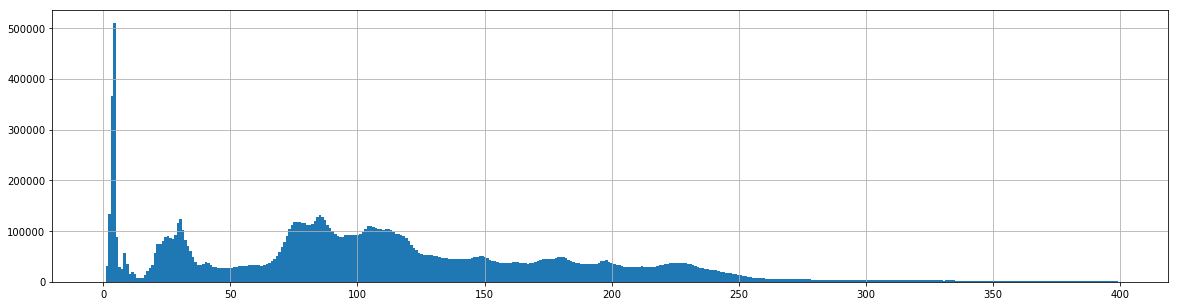

In [17]:
sall_clean['duration'][sall_clean['duration'] < 400]\
    .hist(bins=400,figsize=(20,5))

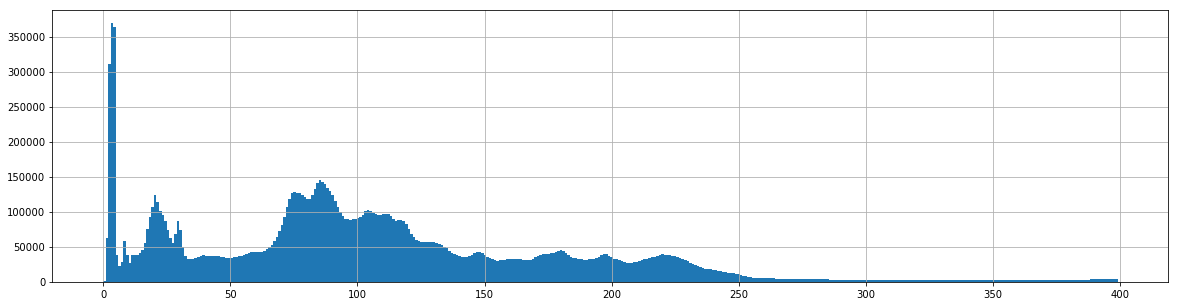

In [16]:
sall_clean['duration_processing'][sall_clean['duration_processing'] < 400]\
    .hist(bins=400,figsize=(20,5))

## 2.2. Analysing individual hosts

In [18]:
server1d = sall_clean['duration']\
    [sall_clean['cluster_host'] == 'jaws01.data.be.nl'].mean()
server2d = sall_clean['duration']\
    [sall_clean['cluster_host'] == 'jaws02.data.be.nl'].mean()
server3d = sall_clean['duration']\
    [sall_clean['cluster_host'] == 'jaws03.data.be.nl'].mean()
server4d = sall_clean['duration']\
    [sall_clean['cluster_host'] == 'jaws04.data.be.nl'].mean()
server5d = sall_clean['duration']\
    [sall_clean['cluster_host'] == 'jaws05.data.be.nl'].mean()
server6d = sall_clean['duration']\
    [sall_clean['cluster_host'] == 'jaws06.data.be.nl'].mean()
server7d = sall_clean['duration']\
    [sall_clean['cluster_host'] == 'jaws07.data.be.nl'].mean()
server8d = sall_clean['duration']\
    [sall_clean['cluster_host'] == 'jaws08.data.be.nl'].mean()
server9d = sall_clean['duration']\
    [sall_clean['cluster_host'] == 'jaws09.data.be.nl'].mean()
server10d = sall_clean['duration']\
    [sall_clean['cluster_host'] == 'jaws10.data.be.nl'].mean()
server1d,server2d,server3d,server4d,server5d,\
    server6d,server7d,server8d,server9d
# Mean duration of jobs handling in milliseconds per server

(363.37277545977315,
 314.62609565291694,
 343.2898743282698,
 366.0581282351531,
 376.8860900868163,
 359.7692577928106,
 359.56102656378664,
 416.4833476579287,
 357.5704496684261)

In [20]:
server1dp = sall_clean['duration_processing']\
    [sall_clean['cluster_host'] == 'jaws01.data.be.nl'].mean()
server2dp = sall_clean['duration_processing']\
    [sall_clean['cluster_host'] == 'jaws02.data.be.nl'].mean()
server3dp = sall_clean['duration_processing']\
    [sall_clean['cluster_host'] == 'jaws03.data.be.nl'].mean()
server4dp = sall_clean['duration_processing']\
    [sall_clean['cluster_host'] == 'jaws04.data.be.nl'].mean()
server5dp = sall_clean['duration_processing']\
    [sall_clean['cluster_host'] == 'jaws05.data.be.nl'].mean()
server6dp = sall_clean['duration_processing']\
    [sall_clean['cluster_host'] == 'jaws06.data.be.nl'].mean()
server7dp = sall_clean['duration_processing']\
    [sall_clean['cluster_host'] == 'jaws07.data.be.nl'].mean()
server8dp = sall_clean['duration_processing']\
    [sall_clean['cluster_host'] == 'jaws08.data.be.nl'].mean()
server9dp = sall_clean['duration_processing']\
    [sall_clean['cluster_host'] == 'jaws09.data.be.nl'].mean()
server10dp = sall_clean['duration_processing']\
    [sall_clean['cluster_host'] == 'jaws10.data.be.nl'].mean()
server1dp,server2dp,server3dp,server4dp,server5dp,\
    server6dp,server7dp,server8dp,server9dp
# Mean job processing duration in milliseconds per server

(349.0477566098928,
 300.35852023331955,
 328.9663656751153,
 351.6499324482868,
 361.8292018464788,
 344.53047909499816,
 342.1877916374394,
 399.65716192070204,
 340.4143319029261)

In [21]:
server1d-server1dp,server2d-server2dp,server3d-server3dp,\
    server4d-server4dp,server5d-server5dp,server6d-server6dp,\
    server7d-server7dp,server8d-server8dp,server9d-server9dp
# Expected network latency in milliseconds per server

(14.325018849880337,
 14.267575419597392,
 14.323508653154477,
 14.408195786866315,
 15.056888240337514,
 15.23877869781245,
 17.373234926347266,
 16.826185737226638,
 17.15611776549997)

## 2.3. Analysing Hourly Day-Night Pattern

In [32]:
firstday = sall_clean.loc[(sall_clean['datetime'] >= '2016-09-26 00:00:00.000') 
        & (sall_clean['datetime'] < '2016-09-27 00:00:00.000')]
secondday = sall_clean.loc[(sall_clean['datetime'] >= '2016-09-27 00:00:00.000') 
        & (sall_clean['datetime'] < '2016-09-28 00:00:00.000')]
firsthour = sall_clean.loc[(sall_clean['datetime'] >= '2016-09-26 00:00:00.000') 
        & (sall_clean['datetime'] < '2016-09-26 00:01:00.000')]
secondhour = sall_clean.loc[(sall_clean['datetime'] >= '2016-09-26 00:01:00.000') 
        & (sall_clean['datetime'] < '2016-09-26 00:02:00.000')]
ninethhour = sall_clean.loc[(sall_clean['datetime'] >= '2016-09-26 00:09:00.000') 
        & (sall_clean['datetime'] < '2016-09-26 00:10:00.000')]
twelfthhour = sall_clean.loc[(sall_clean['datetime'] >= '2016-09-26 00:12:00.000') 
        & (sall_clean['datetime'] < '2016-09-26 00:13:00.000')]

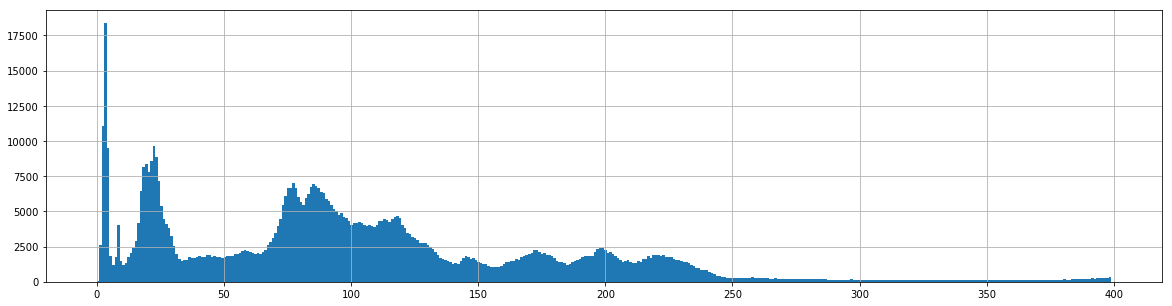

In [26]:
firstday['duration_processing'][firstday['duration_processing'] < 400]\
    .hist(bins=400,figsize=(20,5))

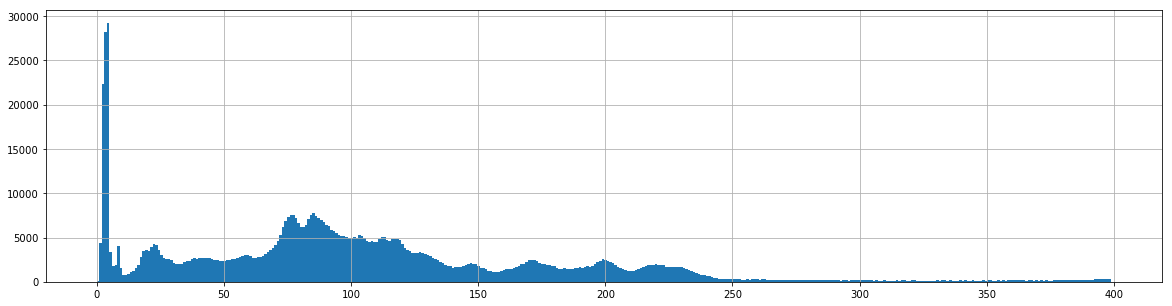

In [27]:
secondday['duration_processing'][secondday['duration_processing'] < 400]\
    .hist(bins=400,figsize=(20,5))

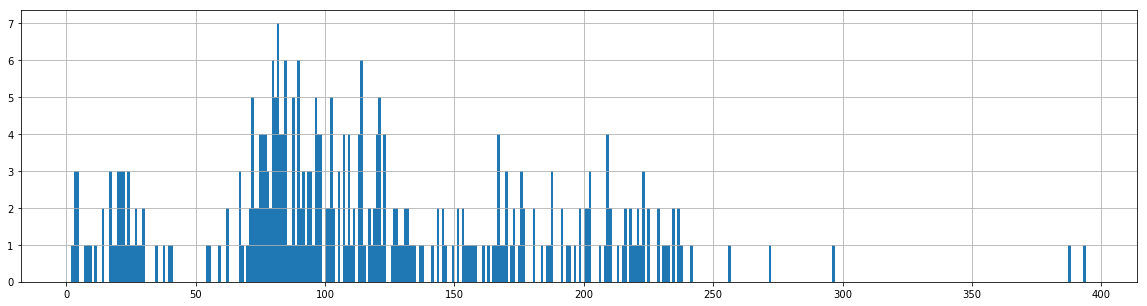

In [28]:
firsthour['duration_processing'][firsthour['duration_processing'] < 400]\
    .hist(bins=400,figsize=(20,5))

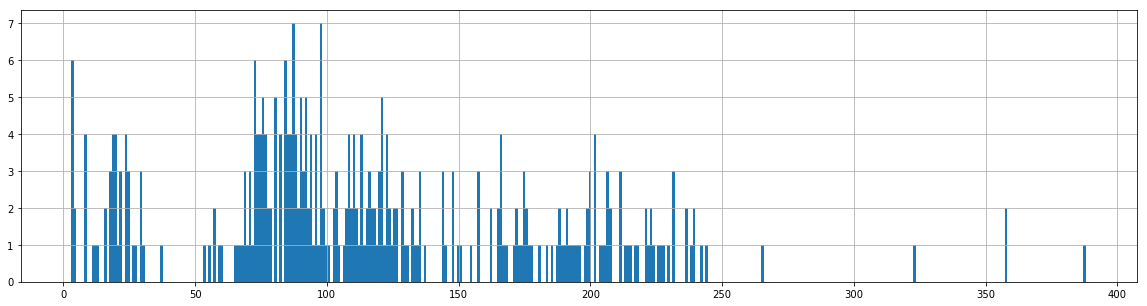

In [29]:
secondhour['duration_processing'][secondhour['duration_processing'] < 400]\
    .hist(bins=400,figsize=(20,5))

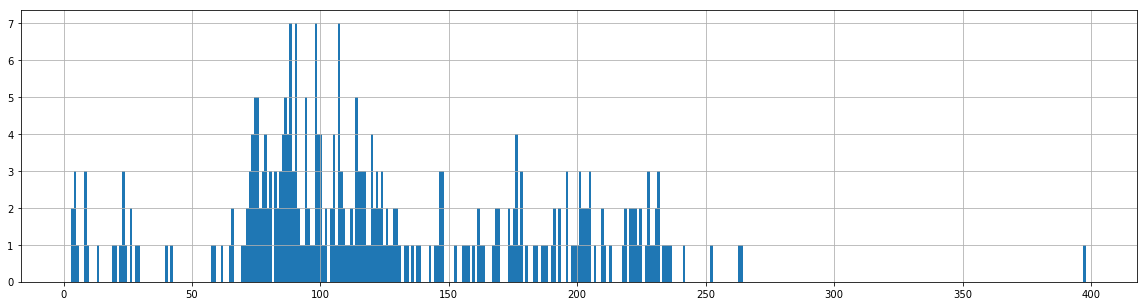

In [33]:
ninethhour['duration_processing'][ninethhour['duration_processing'] < 400]\
    .hist(bins=400,figsize=(20,5))

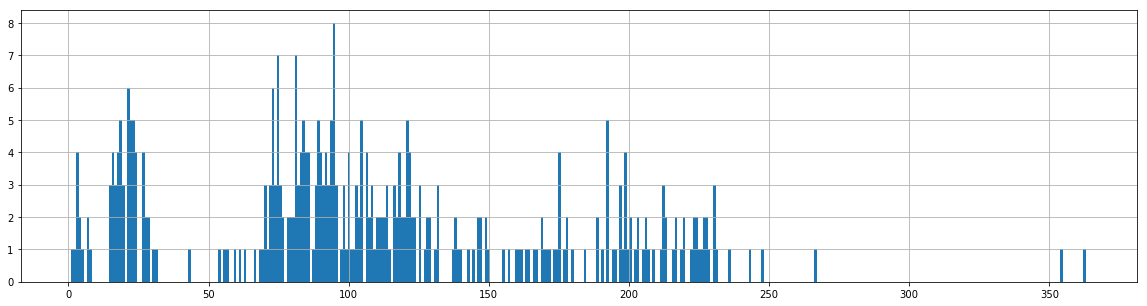

In [34]:
twelfthhour['duration_processing'][twelfthhour['duration_processing'] < 400]\
    .hist(bins=400,figsize=(20,5))